In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

### Read and merge imdb and the reviewer data

In [101]:
df = pd.read_csv('data/movie_details5000.csv')
df['Title'] = df['Title'].str[:-7]
df.head()
df.to_csv('data/the_reviewer.csv')

In [102]:
df1 = pd.read_csv('data/the_reviewer.csv')
df2 = pd.read_csv('data/imdb.csv')
df = pd.merge(df1, df2, on='Title')
drop_columns = ['Rating_Count', 'Keywords', 'Release', 'Movie_ID', 'Filming_Location', 'Worldwide Box Office','Unnamed: 0']
df.drop(drop_columns, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3656 non-null   object 
 1   Theater counts     2805 non-null   object 
 2   Opening Weekend    3362 non-null   object 
 3   Budget             3316 non-null   object 
 4   Cast               3654 non-null   object 
 5   Crew               3655 non-null   object 
 6   Studios            3653 non-null   object 
 7   Genre              3396 non-null   object 
 8   Languages          3652 non-null   object 
 9   Countries          3655 non-null   object 
 10  Release_Data       3656 non-null   object 
 11  Runtime            3656 non-null   object 
 12  Gross_worldwide    3550 non-null   object 
 13  Rating             3656 non-null   float64
 14  ListOfCertificate  3519 non-null   object 
dtypes: float64(1), object(14)
memory usage: 428.6+ KB


### Drop all records which Gross_worldwide is null

In [103]:
df.dropna(subset=['Gross_worldwide'], inplace=True)
df.reset_index(drop=True, inplace=True)

### Parse some attribute

In [104]:
def parse_currency(before_parsed):
    if '$' in before_parsed:
        after_parsed = int(before_parsed.strip('$').replace(',', ""))
    else:
        after_parsed = int(int(before_parsed.strip('€').replace(',', "")) * 1.14)
    return after_parsed

In [105]:
def parse_runtime(time):
    time = str(time)
    time = time.replace(" ", "")
    if "hour" in time:
        hours = 0
        if "hours" in time:
            hours = int(time[0]) * 60
            after_eliminate_hour = time.replace("hours", "")
        else:
            hours = 60
            after_eliminate_hour = time.replace("hour", "")
        minutes = 0
        if "minute" in after_eliminate_hour:
            if "minutes" in after_eliminate_hour:
                minutes = int(after_eliminate_hour.replace("minutes", "")[1:])
            else:
                minutes = 1
        return int(hours) + int(minutes)
    else:
        return int(time.replace("minutes", ""))

In [106]:
def parse_multi_value(field_value):
    array_value = field_value.split(',')
    if '' in array_value:
        return []
    return array_value

### Fill null value

In [107]:
df.isnull().sum()

Title                  0
Theater counts       787
Opening Weekend      240
Budget               308
Cast                   1
Crew                   1
Studios                2
Genre                249
Languages              2
Countries              1
Release_Data           0
Runtime                0
Gross_worldwide        0
Rating                 0
ListOfCertificate     92
dtype: int64

In [82]:
df.head(2)

,Title,Theater counts,Opening Weekend,Budget,Cast,Crew,Studios,Genre,Languages,Countries,Release_Data,Runtime,Gross_worldwide,Rating,ListOfCertificate
0,Avatar,"3,452","$77,025,481","$237,000,000","Sam Worthington,Zoe Saldana,Sigourney Weaver,M...",James Cameron,"Twentieth Century Fox,Dune Entertainment,Light...","Action,Adventure,Fantasy,Sci-Fi","English,Spanish",United States,2009-12-18,2 hours 42 minutes,"$2,847,246,203",7.8,PG-13
1,Avengers: Endgame,"4,662","$357,115,007","$356,000,000","Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chr...","Stan Lee,Joe Russo,Christopher Markus,Stephen ...","Marvel Studios,Walt Disney Pictures","Action,Adventure,Drama,Sci-Fi","English,Japanese,Xhosa,German",United States,2019-04-26,3 hours 1 minute,"$2,797,501,328",8.4,PG-13


In [108]:
df['Theater counts'].fillna('0', inplace=True)
df['Opening Weekend'].fillna('$0', inplace=True)
df['Budget'].fillna('$0', inplace=True)
df['ListOfCertificate'].fillna('G', inplace=True)
df.fillna('', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12816\596629826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Theater counts'].fillna('0', inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12816\596629826.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

### Parsing attribute

In [109]:
df['Gross_worldwide'] = df['Gross_worldwide'].apply(parse_currency)
df['Opening Weekend'] = df['Opening Weekend'].apply(parse_currency)
df['Budget'] = df['Budget'].apply(parse_currency)

In [110]:
df['Theater counts'] = df['Theater counts'].str.replace(',', '')
df['Theater counts'] = pd.to_numeric(df['Theater counts'], errors='coerce')
df['Runtime'] = df['Runtime'].apply(parse_runtime)

In [111]:
cols = ['Cast', 'Genre', 'Studios', 'ListOfCertificate', 'Languages', 'Countries', 'Crew']
for col in cols:
    df[col] = df[col].apply(parse_multi_value)

In [112]:
df['Release_Data'] = pd.to_datetime(df['Release_Data'], format='%Y-%m-%d')
df['Release_Year'] = df['Release_Data'].apply(lambda x: x.year)
df['Release_Month'] = df['Release_Data'].apply(lambda x: x.month)
df['Release_Day'] = df['Release_Data'].apply(lambda x: x.day)

### Replace value 0 to mean

In [113]:
mean_bugdet = int(df['Budget'][df['Budget'] != 0].mean())
print(mean_bugdet)
mean_opening = int(df['Opening Weekend'][df['Opening Weekend'] != 0].mean())
print(mean_opening)
mean_theater = int(df['Theater counts'][df['Theater counts'] != 0].mean())
print(mean_theater)
df['Budget'] = df['Budget'].replace(0, mean_bugdet)
df['Opening Weekend'] = df['Opening Weekend'].replace(0, mean_opening)
df['Theater counts'] = df['Theater counts'].replace(0, mean_theater)


47309015
18260007
2381


### Replace old MPAA rating with new one

In [118]:
old_rating = ['M', 'X', 'GP', 'M/PG']
for data in df['ListOfCertificate']:
    for cerf in data:
        if cerf in old_rating:
            data.remove(cerf)
            if cerf == 'X':
                if 'NC-17' not in data:
                    data.append('NC-17')
            else:
                if 'PG' not in data:
                    data.append('PG')

cerfs = []
for data in df['ListOfCertificate']:
    for cerf in data:
        if cerf not in cerfs:
            cerfs.append(cerf)
print(cerfs)

['PG-13', 'PG', 'G', 'R', 'NC-17']


In [116]:
casts = []
for data in df['Cast']:
    for cast in data:
        if cast not in casts:
            casts.append(cast)
print(len(casts))

30967


In [91]:
crews = []
for data in df['Crew']:
    for crew in data:
        if crew not in crews:
            crews.append(crew)
print(len(crews))

4819


In [92]:
languages = []
for data in df['Languages']:
    for language in data:
        if language not in languages:
            languages.append(language)
print(len(languages))

147


In [93]:
studios = []
for data in df['Studios']:
    for studio in data:
        if studio not in studios:
            studios.append(studio)
print(len(studios))

2550


In [94]:
genres = []
for data in df['Genre']:
    for genre in data:
        if genre not in genres:
            genres.append(genre)
print(len(genres))

23


In [95]:
countries = []
for data in df['Countries']:
    for country in data:
        if country not in countries:
            countries.append(country)
print(len(countries))

74


In [96]:
df.head()

,Title,Theater counts,Opening Weekend,Budget,Cast,Crew,Studios,Genre,Languages,Countries,Release_Data,Runtime,Gross_worldwide,Rating,ListOfCertificate,Release_Year,Release_Month,Release_Day
0,Avatar,3452,77025481,237000000,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[Twentieth Century Fox, Dune Entertainment, Li...","[Action, Adventure, Fantasy, Sci-Fi]","[English, Spanish]",[United States],2009-12-18,162,2847246203,7.8,[PG-13],2009,12,18
1,Avengers: Endgame,4662,357115007,356000000,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...","[Stan Lee, Joe Russo, Christopher Markus, Step...","[Marvel Studios, Walt Disney Pictures]","[Action, Adventure, Drama, Sci-Fi]","[English, Japanese, Xhosa, German]",[United States],2019-04-26,181,2797501328,8.4,[PG-13],2019,4,26
2,Titanic,2674,28638131,200000000,"[Leonardo DiCaprio, Kate Winslet, Billy Zane, ...",[James Cameron],"[Twentieth Century Fox, Paramount Pictures, Li...","[Drama, Romance]","[English, Swedish, Italian, French]","[United States, Mexico, Australia]",1997-12-18,194,2201647264,7.8,[PG-13],1997,12,18
3,Avengers: Infinity War,4474,257698183,321000000,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...","[Stan Lee, Joe Russo, Christopher Markus, Step...","[Marvel Studios, Jason Roberts Productions, So...","[Action, Adventure, Sci-Fi]",[English],[United States],2018-04-25,149,2048359754,8.4,[PG-13],2018,4,25
4,Jurassic World,4274,208806270,150000000,"[Chris Pratt, Bryce Dallas Howard, Ty Simpkins...","[Colin Trevorrow, Amanda Silver, Rick Jaffa]","[Universal Pictures, Amblin Entertainment, Leg...","[Action, Adventure, Sci-Fi]",[English],[United States],2015-06-12,124,1670516444,7.0,[PG-13],2015,6,12


<Axes: >

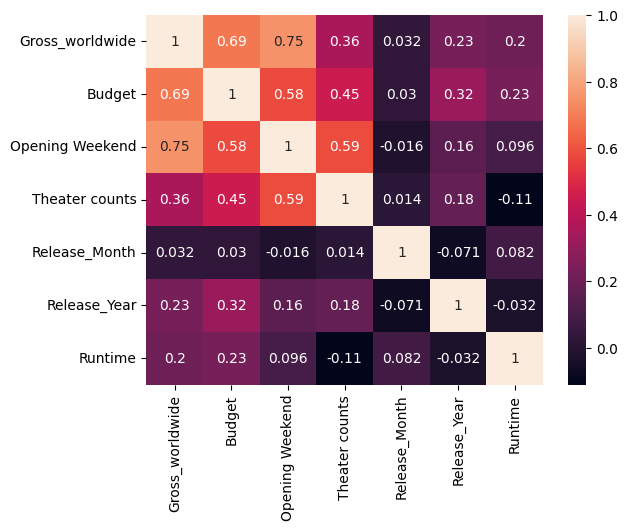

In [119]:
cols = ['Gross_worldwide', 'Budget', 'Opening Weekend', 'Theater counts', 'Release_Month','Release_Year', 'Runtime']
info = df[cols]
sns.heatmap(info.corr(), annot=True)

array([[<Axes: title={'center': 'Theater counts'}>,
        <Axes: title={'center': 'Opening Weekend'}>,
        <Axes: title={'center': 'Budget'}>],
       [<Axes: title={'center': 'Release_Data'}>,
        <Axes: title={'center': 'Runtime'}>,
        <Axes: title={'center': 'Gross_worldwide'}>],
       [<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Release_Year'}>,
        <Axes: title={'center': 'Release_Month'}>],
       [<Axes: title={'center': 'Release_Day'}>, <Axes: >, <Axes: >]],
      dtype=object)

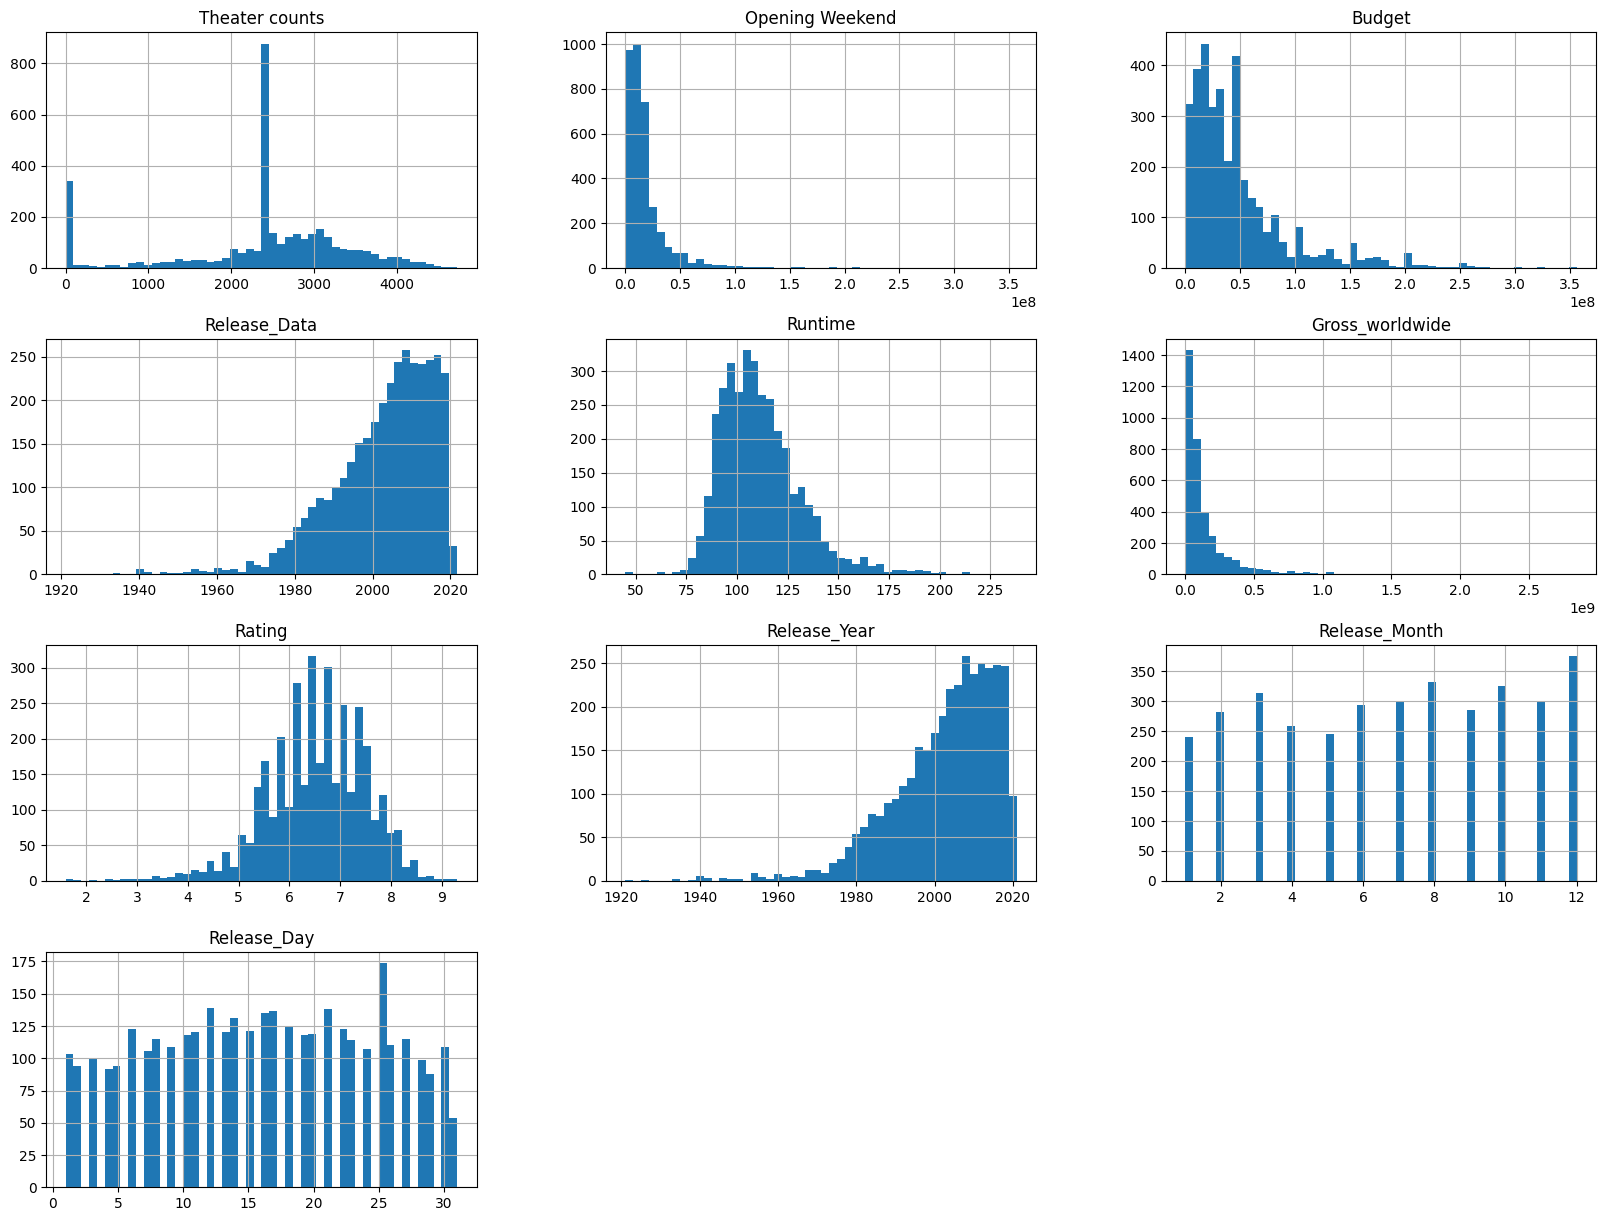

In [120]:
df.hist(bins=50, figsize=(20, 15))

In [ ]:
df = df[df['Release_Year'] > 1980]
df.to_csv('data/cleaning_data.csv')
df = df[df['Gross_worldwide'] > 10000000]
df.reset_index(drop=True, inplace=True)